## importacion de librerias necesarias
 
 

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#directorio de imagenes
base_path="../Images/"


## 2. Implementar y comparar diferentes transformaciones de intensidad a nivel de píxel.
Con un teléfono celular tomen dos fotografías de la fachada (puede ser de la casa de algún integrante del equipo) a las 6 am y a las 7 pm. Las fotografías deben ser desde el mismo punto. Sobre las fotografías ilustren las siguientes operaciones (implementadas a mano):
* Ajuste de brillo
* Ajuste de contraste
* Corrección gama
* Sumen (A+B), resten(A-B), multipliquen (A*B) y dividan (A/B) ambas fotografías.

In [3]:
#Cargar imagenes
fachadaDia = cv2.imread(base_path + "fachada_dia.jpeg")
fachadaNoche = cv2.imread(base_path + "fachada_noche.jpeg")

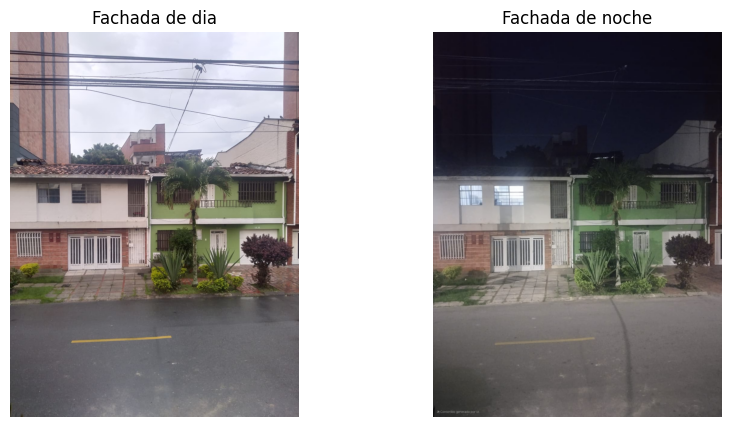

In [4]:
#mostrar imagenes 
import matplotlib.pyplot as plt
def mostrar_imagenes_color(imagen1, imagen2, titulo1, titulo2):
    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    plt.imshow(cv2.cvtColor(imagen1, cv2.COLOR_BGR2RGB))
    plt.title(titulo1)
    plt.axis("off")
    plt.subplot(1,2,2)
    plt.imshow(cv2.cvtColor(imagen2, cv2.COLOR_BGR2RGB))
    plt.title(titulo2)
    plt.axis("off")
    plt.show()

def mostrar_imagenes_grises(imagen1, imagen2, titulo1, titulo2):
    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    plt.imshow(imagen1, cmap='gray')
    plt.title(titulo1)
    plt.axis("off")
    plt.subplot(1,2,2)
    plt.imshow(imagen2, cmap='gray')
    plt.title(titulo2)
    plt.axis("off")
    plt.show()

mostrar_imagenes_color(fachadaDia, fachadaNoche, "Fachada de dia", "Fachada de noche")

### Escala de grises
Conviertan ambas imágenes a escala de grises utilizando la fórmula de luminosidad: Y = 0.21 R + 0.72 G + 0.07 B

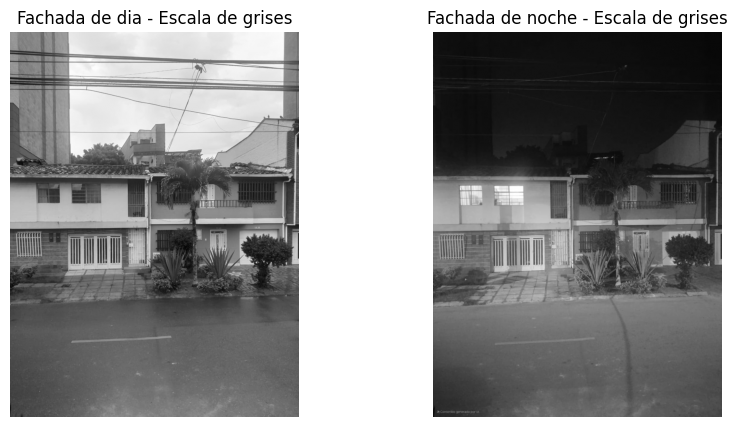

In [5]:
## tranformacion a escala de grises con la formula de luminosidad
#dia
fachada_dia_grises = np.dot(fachadaDia[...,:3], [0.21, 0.72, 0.07])
#noche
fachada_noche_grises = np.dot(fachadaNoche[...,:3], [0.21, 0.72, 0.07])
#mostrar imagenes en escala de grises
mostrar_imagenes_grises(fachada_dia_grises, fachada_noche_grises, "Fachada de dia - Escala de grises", "Fachada de noche - Escala de grises")

In [6]:
## funcion remplazar si el pixel es mayor a 255 toma valor 255 y si es menor a 0 toma valor 0
def saturar_imagen(imagen):
    imagen_saturada = np.where(imagen > 255, 255, imagen)
    imagen_saturada = np.where(imagen_saturada < 0, 0, imagen_saturada)
    return imagen_saturada.astype('uint8')

#### Ajuste de brillo

In [7]:
## funcion de ajuste de brillo
def ajustar_brillo_imagen(imagen, valor_brillo):

    # Convertir la imagen a tipo int16 para evitar overflow/underflow
    imagen_int = imagen.astype('int16')
    
    # Ajustar el brillo
    imagen_ajustada = imagen_int + valor_brillo
    
    # asegurar que los valores estén en el rango [0, 255]
    imagen_ajustada = saturar_imagen(imagen_ajustada)
    
    # Convertir de nuevo a uint8 (saturar_imagen ya devuelve uint8)
    return imagen_ajustada

Imagenes originales en escala de grises


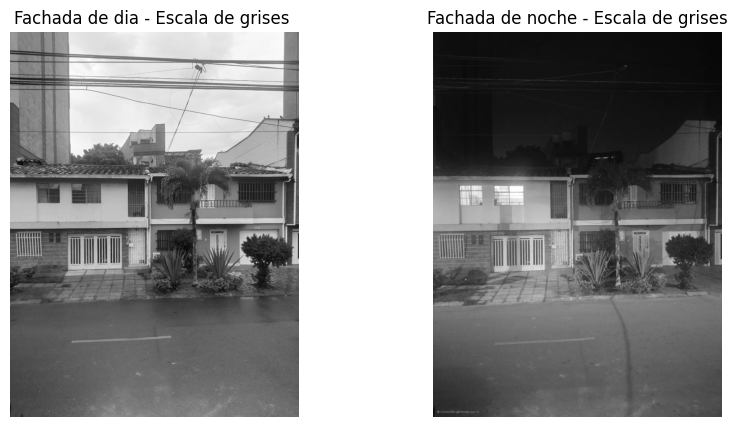

Imagenes con con brillo ajustado


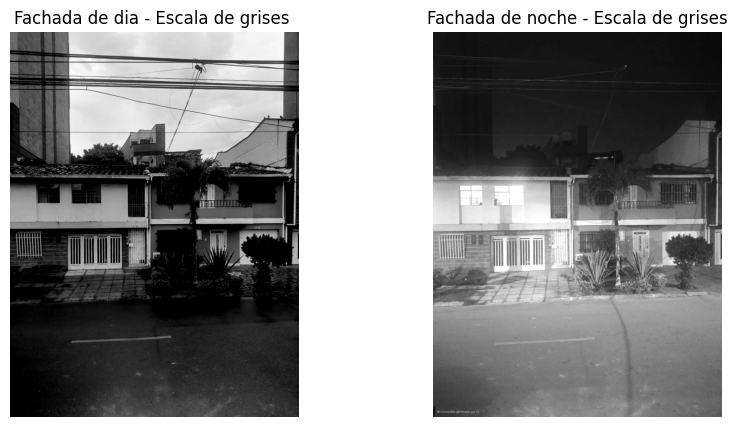

medias de las imagenes originales
Media fachada dia original: 133.03938770345042
Media fachada noche original: 76.43237952473959
medias de las imagenes con brillo ajustado
Media fachada dia brillo ajustado: 55.91535807291667
Media fachada noche brillo ajustado: 135.69476399739582


In [8]:
##fachada dia ajustada de brillo -60
fachada_dia_grises_brillo_ajustado = ajustar_brillo_imagen(fachada_dia_grises, -80)
##fachada noche ajustada de brillo +60
fachada_noche_grises_brillo_ajustado = ajustar_brillo_imagen(fachada_noche_grises, 60)
#mostrar imagenes en escala de grises con brillo ajustado
print("Imagenes originales en escala de grises")
mostrar_imagenes_grises(fachada_dia_grises, fachada_noche_grises, "Fachada de dia - Escala de grises ", "Fachada de noche - Escala de grises")
print("Imagenes con con brillo ajustado")
mostrar_imagenes_grises(fachada_dia_grises_brillo_ajustado, fachada_noche_grises_brillo_ajustado, "Fachada de dia - Escala de grises ", "Fachada de noche - Escala de grises")

print("medias de las imagenes originales")
print("Media fachada dia original:", np.mean(fachada_dia_grises))
print("Media fachada noche original:", np.mean(fachada_noche_grises))

print("medias de las imagenes con brillo ajustado")
print("Media fachada dia brillo ajustado:", np.mean(fachada_dia_grises_brillo_ajustado))
print("Media fachada noche brillo ajustado:", np.mean(fachada_noche_grises_brillo_ajustado))

#### Ajuste de contraste

In [9]:
## funciones de ajuste de contraste
def ajustar_contraste_imagen(imagen, factor_contraste):
    # Convertir la imagen a tipo float para evitar overflow/underflow
    imagen_float = imagen.astype('float32')
    
    # Ajustar el contraste
    imagen_ajustada = (imagen_float - 128) * factor_contraste +128
    
    # asegurar que los valores estén en el rango [0, 255]
    imagen_ajustada = saturar_imagen(imagen_ajustada)
    
    # Convertir de nuevo a uint8 (saturar_imagen ya devuelve uint8)
    return imagen_ajustada

Imagenes originales en escala de grises


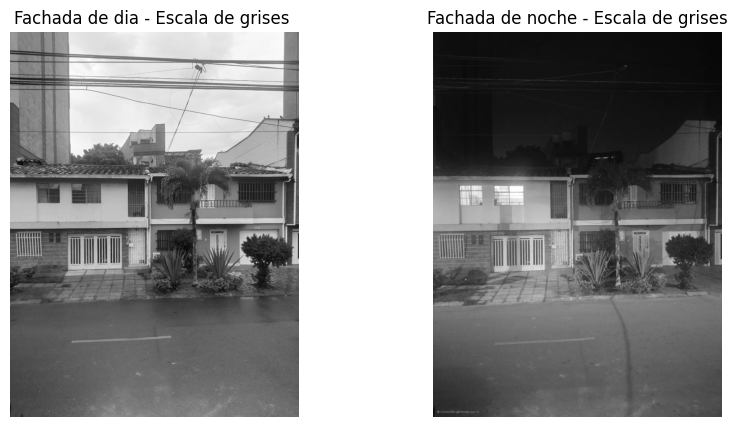

Imagenes con con contraste ajustado


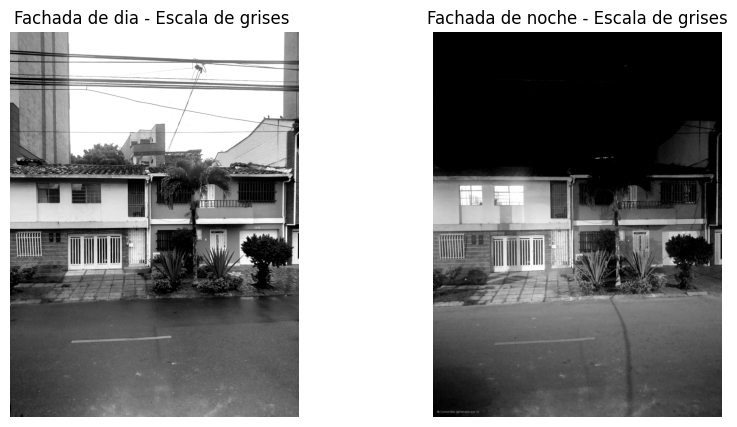

In [10]:
##fachada dia
fachada_dia_grises_contraste_ajustado = ajustar_contraste_imagen(fachada_dia_grises, 1.5)
##fachada noche
fachada_noche_grises_contraste_ajustado = ajustar_contraste_imagen(fachada_noche_grises, 1.5)
#mostrar imagenes en escala de grises sin y con contraste ajustado
print("Imagenes originales en escala de grises")
mostrar_imagenes_grises(fachada_dia_grises, fachada_noche_grises, "Fachada de dia - Escala de grises ", "Fachada de noche - Escala de grises")
print("Imagenes con con contraste ajustado")
mostrar_imagenes_grises(fachada_dia_grises_contraste_ajustado, fachada_noche_grises_contraste_ajustado, "Fachada de dia - Escala de grises ", "Fachada de noche - Escala de grises")

#### Corrección gama

In [11]:
def corregir_gama_imagen(imagen, gamma):
    # Convertir la imagen a tipo float y normalizar a [0, 1]
    imagen_float = imagen.astype('float32') 
    
    # Aplicar corrección gamma
    imagen_ajustada = 255 * np.power((imagen_float/255), gamma)
    
    # Asegurar que los valores estén en el rango [0, 255]
    #este paso se puede omitir dado que en el calculo no se salen de rango
    imagen_ajustada = saturar_imagen(imagen_ajustada)
    
    # Convertir de nuevo a uint8 (saturar_imagen ya devuelve uint8)
    return imagen_ajustada

Imagenes originales en escala de grises


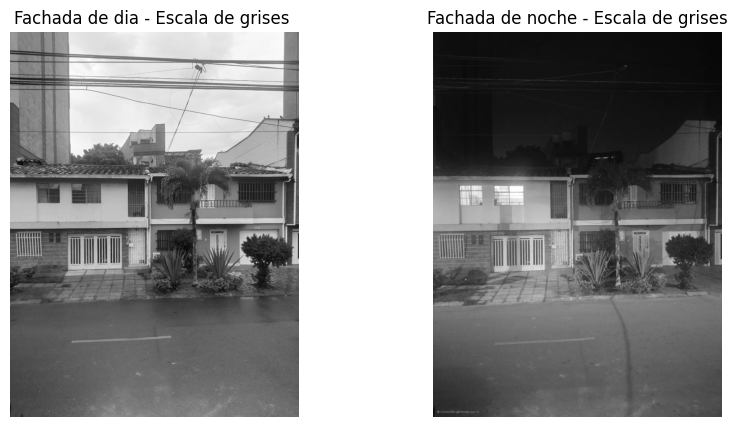

Imagenes con correccion gama (gamma <1 - aclara)


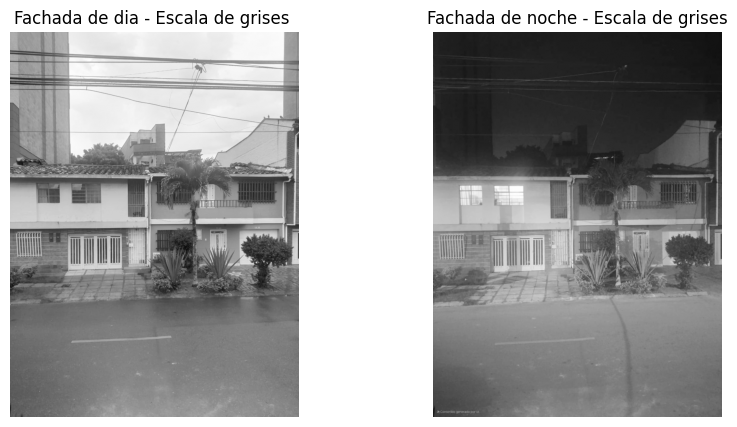

Imagenes con correccion gama (gamma >1 - oscurece)


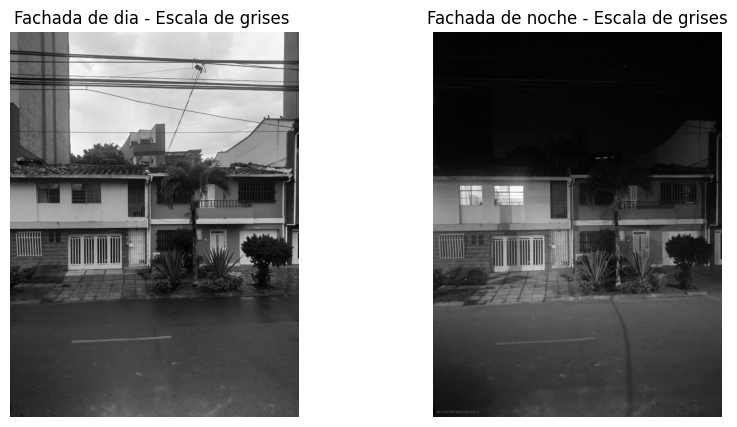

In [12]:
# fachada dia gamma <1
fachada_dia_grises_gama_ajustada_aclara = corregir_gama_imagen(fachada_dia_grises, 0.7)
# fachada noche gamma <1
fachada_noche_grises_gama_ajustada_aclara = corregir_gama_imagen(fachada_noche_grises, 0.7)
#fachada dia gamma >1
fachada_dia_grises_gama_ajustada_oscurece = corregir_gama_imagen(fachada_dia_grises, 1.5)
#fachada noche gamma >1
fachada_noche_grises_gama_ajustada_oscurece = corregir_gama_imagen(fachada_noche_grises, 1.5)
#mostrar imagenes en escala de grises sin y con correccion gama
print("Imagenes originales en escala de grises")
mostrar_imagenes_grises(fachada_dia_grises, fachada_noche_grises, "Fachada de dia - Escala de grises ", "Fachada de noche - Escala de grises")
print("Imagenes con correccion gama (gamma <1 - aclara)")
mostrar_imagenes_grises(fachada_dia_grises_gama_ajustada_aclara, fachada_noche_grises_gama_ajustada_aclara, "Fachada de dia - Escala de grises ", "Fachada de noche - Escala de grises")
print("Imagenes con correccion gama (gamma >1 - oscurece)")
mostrar_imagenes_grises(fachada_dia_grises_gama_ajustada_oscurece, fachada_noche_grises_gama_ajustada_oscurece, "Fachada de dia - Escala de grises ", "Fachada de noche - Escala de grises")

#### Operaciones aritméticas entre imágenes

In [13]:
def suma_imagenes(imagen1, imagen2):
    # Convertir las imágenes a tipo int16 para evitar overflow
    imagen1_int = imagen1.astype('int16')
    imagen2_int = imagen2.astype('int16')
    
    # Sumar las imágenes
    imagen_suma = imagen1_int + imagen2_int
    
    # Asegurar que los valores estén en el rango [0, 255]
    imagen_suma = saturar_imagen(imagen_suma)
    
    return imagen_suma

def resta_imagenes(imagen1, imagen2):
    # Convertir las imágenes a tipo int16 para evitar underflow
    imagen1_int = imagen1.astype('int16')
    imagen2_int = imagen2.astype('int16')
    
    # Restar las imágenes
    imagen_resta = imagen1_int - imagen2_int
    
    # Asegurar que los valores estén en el rango [0, 255]
    imagen_resta = saturar_imagen(imagen_resta)
    
    return imagen_resta

def multiplicacion_imagenes(imagen1, imagen2):
    # Convertir las imágenes a tipo float32 para evitar overflow
    imagen1_float = imagen1.astype('float32')
    imagen2_float = imagen2.astype('float32')
    
    # Multiplicar las imágenes
    imagen_multiplicacion = (imagen1_float / 255) * (imagen2_float / 255) * 255
    
    # Asegurar que los valores estén en el rango [0, 255]
    imagen_multiplicacion = saturar_imagen(imagen_multiplicacion)
    
    return imagen_multiplicacion

def division_imagenes(imagen1, imagen2):
    # Convertir las imágenes a tipo float32 para evitar overflow
    imagen1_float = imagen1.astype('float32')
    imagen2_float = imagen2.astype('float32')
    
    # Evitar división por cero
    imagen2_float[imagen2_float == 0] = 1
    
    # Dividir las imágenes
    imagen_division = (imagen1_float / imagen2_float) * 255
    
    # Asegurar que los valores estén en el rango [0, 255]
    imagen_division = saturar_imagen(imagen_division)
    
    return imagen_division

imagenes originales  en grises


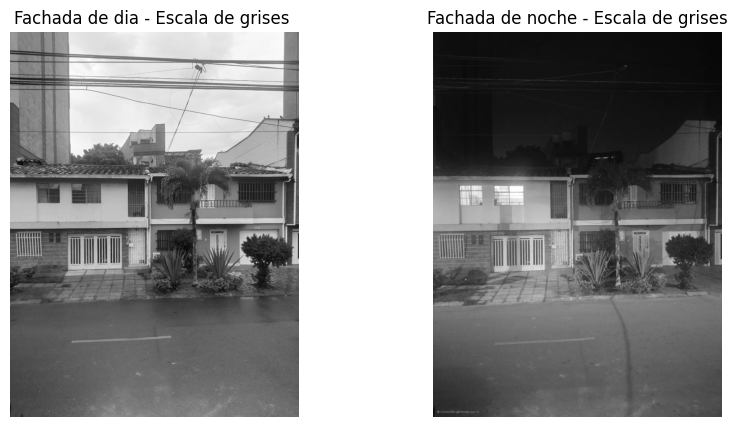

Resultado de las imagenes


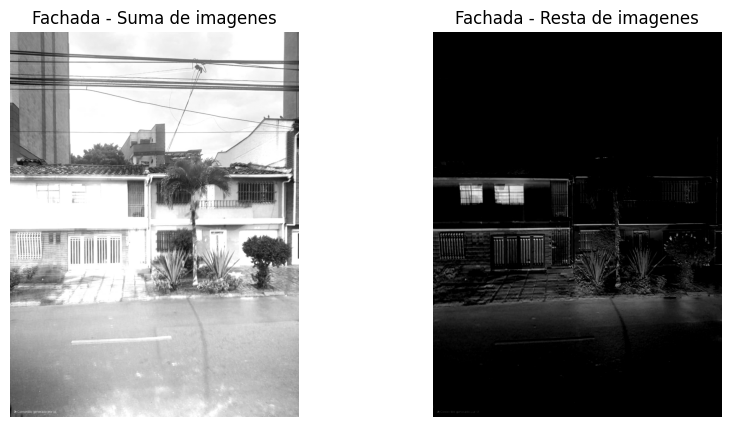

In [14]:
##suma
fachada_grises_suma = suma_imagenes(fachada_dia_grises, fachada_noche_grises)
##resta
fachada_grises_resta = resta_imagenes( fachada_noche_grises,fachada_dia_grises)
##mostrar resultados
print("imagenes originales  en grises")
mostrar_imagenes_grises(fachada_dia_grises, fachada_noche_grises, "Fachada de dia - Escala de grises ", "Fachada de noche - Escala de grises")
print("Resultado de las imagenes")
mostrar_imagenes_grises(fachada_grises_suma, fachada_grises_resta, "Fachada - Suma de imagenes", "Fachada - Resta de imagenes")

imagenes originales  en grises


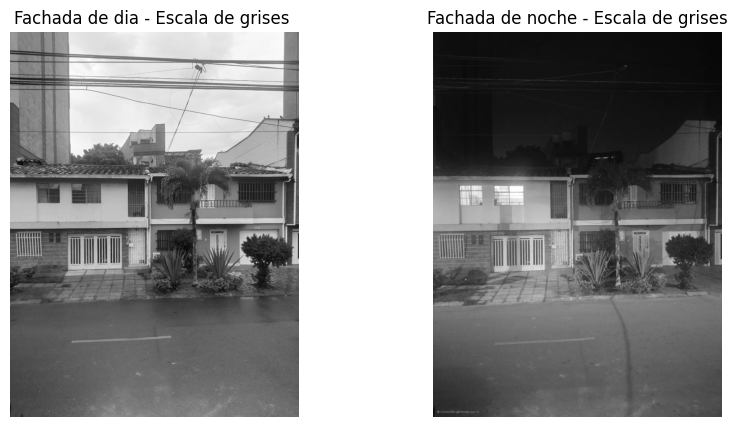

Resultado de las imagenes


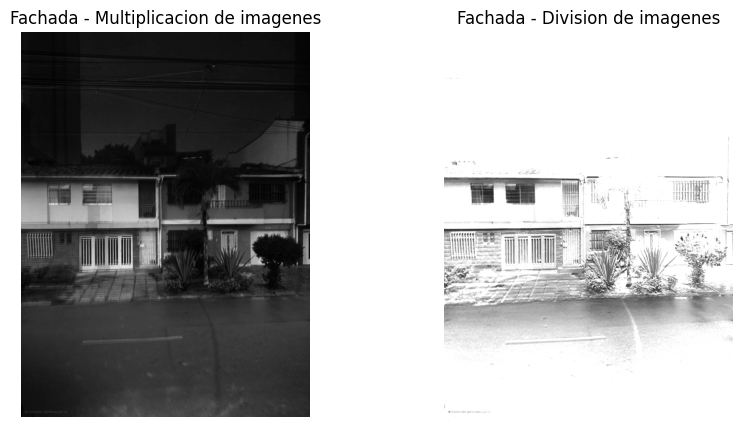

In [15]:
#multiplicacion
fachada_grises_multiplicacion = multiplicacion_imagenes(fachada_dia_grises, fachada_noche_grises)
#division
fachada_grises_division = division_imagenes(fachada_dia_grises, fachada_noche_grises)
#mostrar resultados
print("imagenes originales  en grises")
mostrar_imagenes_grises(fachada_dia_grises, fachada_noche_grises, "Fachada de dia - Escala de grises ", "Fachada de noche - Escala de grises")
print("Resultado de las imagenes")
mostrar_imagenes_grises(fachada_grises_multiplicacion, fachada_grises_division, "Fachada - Multiplicacion de imagenes", "Fachada - Division de imagenes")

### RGB

Imagenes originales en RGB


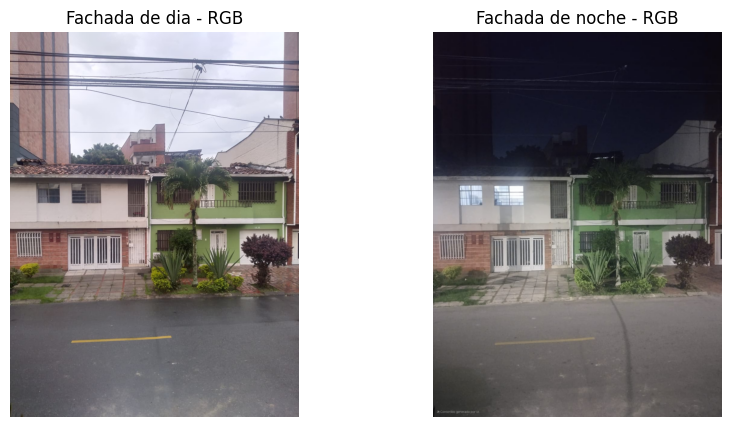

In [16]:
#mostrar imagenes originales en RGB
print("Imagenes originales en RGB")
mostrar_imagenes_color(fachadaDia, fachadaNoche, "Fachada de dia - RGB", "Fachada de noche - RGB")

#### ajuste de brillo en RGB

In [17]:
def ajuste_brillo_imagen_rgb(imagen, r, g, b):
   
    # Separar los canales RGB usando numpy (cada canal es una matriz 2D)
    canales = [imagen[..., i].copy() for i in range(3)]
    
    # Ajustar el brillo de cada canal (se respeta el mapeo original)
    canales[0] = ajustar_brillo_imagen(canales[0], r)
    canales[1] = ajustar_brillo_imagen(canales[1], g)
    canales[2] = ajustar_brillo_imagen(canales[2], b)
        
    # Combinar los canales ajustados de nuevo en una imagen RGB usando numpy
    imagen_ajustada = np.stack(canales, axis=2)
    
    return imagen_ajustada

Imagenes originales en RGB


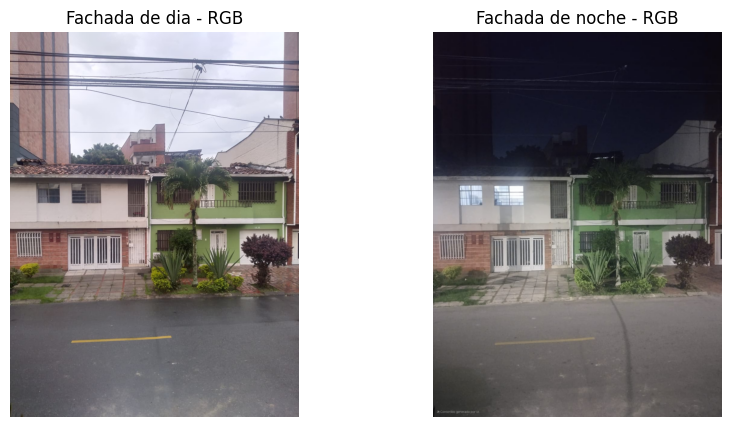

Imagenes con con brillo ajustado en RGB


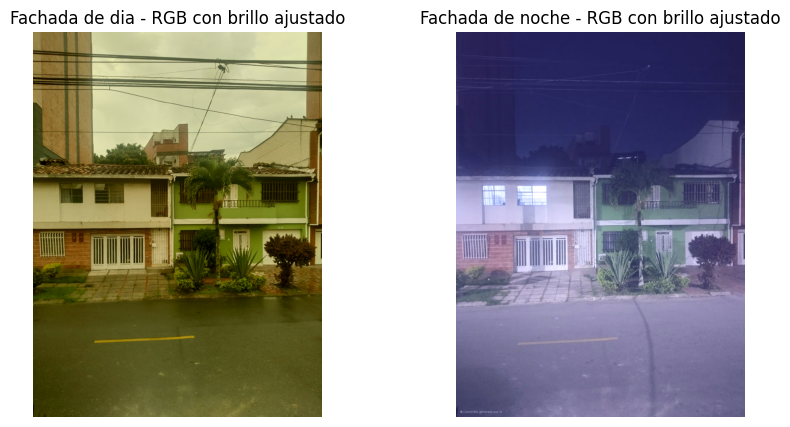

In [18]:
##mostrar imagenes en RGB con brillo ajustado
fachada_dia_rgb_brillo_ajustado = ajuste_brillo_imagen_rgb(fachadaDia, -80, -20, -20)
fachada_noche_rgb_brillo_ajustado = ajuste_brillo_imagen_rgb(fachadaNoche, 60, 20, 20)
print("Imagenes originales en RGB")
mostrar_imagenes_color(fachadaDia, fachadaNoche, "Fachada de dia - RGB", "Fachada de noche - RGB")
print("Imagenes con con brillo ajustado en RGB")
mostrar_imagenes_color(fachada_dia_rgb_brillo_ajustado, fachada_noche_rgb_brillo_ajustado, "Fachada de dia - RGB con brillo ajustado", "Fachada de noche - RGB con brillo ajustado")